<a href="https://colab.research.google.com/github/mkap007/Python_For_Geospatial_Analysis/blob/main/Household_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h3 style="color:seagreen;">Household Prediction Using Linear Regression Model</h3></center>


Importing Libraries:

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [44]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

Data Manipulation:

In [45]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [46]:
data.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
16995,False,False,False,False,False,False,False,False,False
16996,False,False,False,False,False,False,False,False,False
16997,False,False,False,False,False,False,False,False,False
16998,False,False,False,False,False,False,False,False,False


In [47]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [48]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

Correlation Between Variables:

In [49]:
correlation_matrix = data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']].corr()


In [50]:
correlation_matrix

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


Correlation Plot:

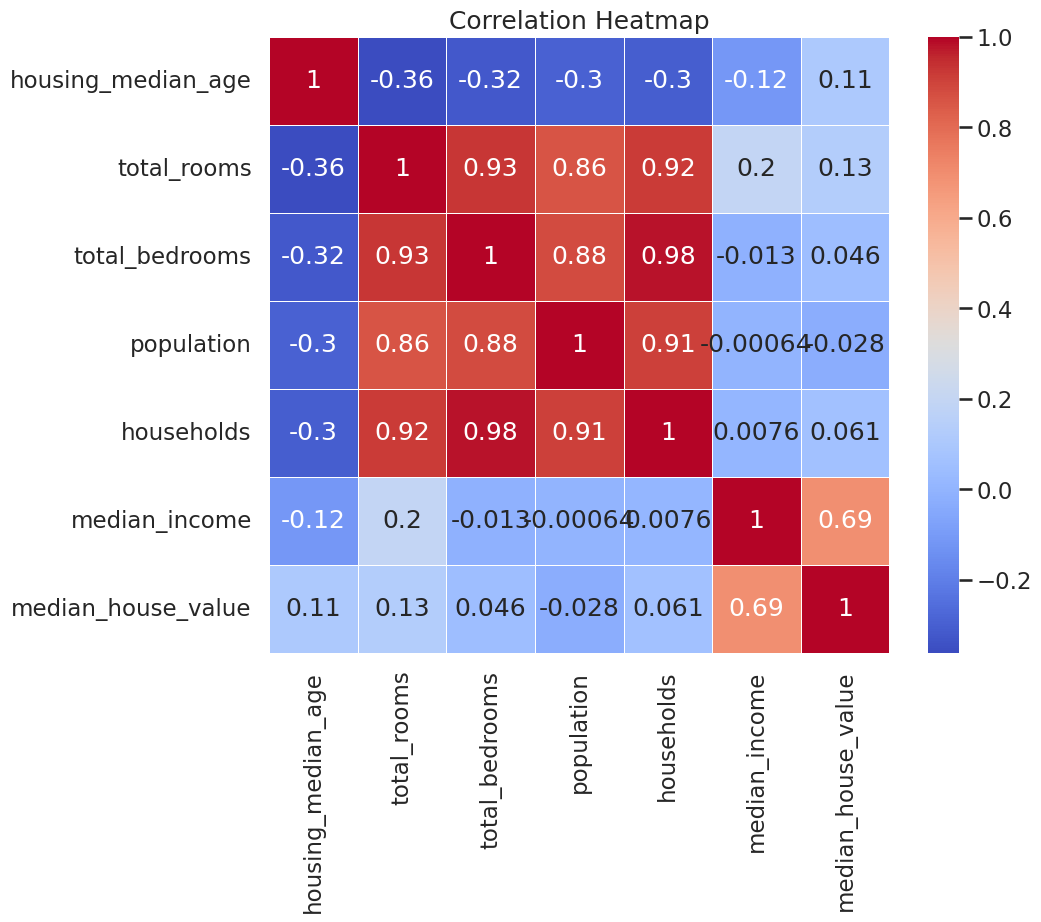

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [52]:
X=data.iloc[:,2:8]

In [53]:
Y=data.median_house_value

In [54]:
X.shape

(17000, 6)

In [55]:
Y.shape

(17000,)

Data Spliting:

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [57]:
xtrain.shape

(11900, 6)

In [58]:
ytrain.shape

(11900,)

In [59]:
xtest.shape

(5100, 6)

In [60]:
xtrain.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9173,12.0,2721.0,549.0,1294.0,523.0,2.5575
16528,27.0,1446.0,329.0,594.0,255.0,1.1650
4819,33.0,1976.0,404.0,1379.0,395.0,3.8542
6818,20.0,1782.0,896.0,1749.0,823.0,2.2094
7717,16.0,4814.0,1381.0,1897.0,1209.0,3.3725


Scaling:

In [61]:
scaler = StandardScaler()

In [62]:
xtrain_scaled = scaler.fit_transform(xtrain)

In [63]:
xtest_scaled = scaler.transform(xtest)

Model:

In [64]:
model = LinearRegression()

In [65]:
model.fit(xtrain_scaled, ytrain)

LinearRegression()

Prediction:

In [66]:
ypred = model.predict(xtest_scaled)

Accuracy Check:

In [67]:
r2 = r2_score(ytest, ypred)

In [68]:
mse = mean_squared_error(ytest, ypred)

In [69]:
rmse = np.sqrt(mse)

Scatter Plots:

<ipython-input-70-fff007328df2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(error_metrics.keys()), y=list(error_metrics.values()), palette='viridis')


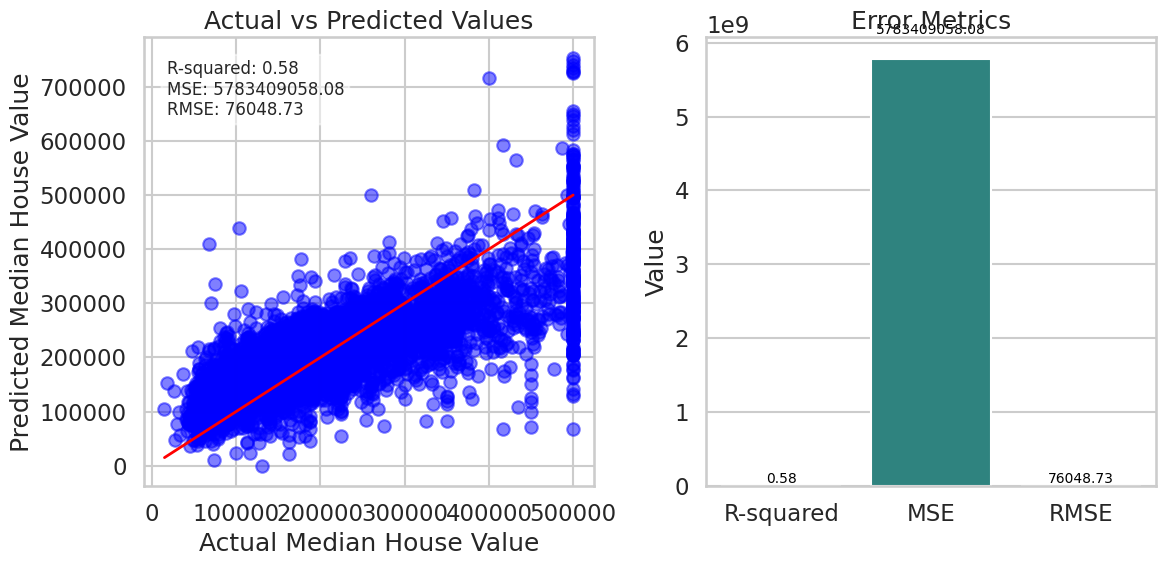

In [70]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(ytest, ypred, color='blue', alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

# annotations for R-squared, MSE, and RMSE
textstr = f'R-squared: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=props)

# plot for the error metrics
plt.subplot(1, 2, 2)
error_metrics = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse}
sns.set_style("whitegrid")
sns.barplot(x=list(error_metrics.keys()), y=list(error_metrics.values()), palette='viridis')
plt.title('Error Metrics')
plt.ylabel('Value')

# adding annotations
for i, value in enumerate(error_metrics.values()):
    plt.text(i, value + (0.05 * value), f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()